In [9]:
import re

## Known Error points

calc_z(Pr=4.98, Tr=Tr, zmodel='hall_yarborough')

calc_z(Pr=2.9, Tr=Tr, zmodel='londono')

In [24]:
filename = 'theories_md.md'
f = open(filename, 'r')
linelist = f.readlines()
f.close

f2 = open('test.md', 'w')
for line in linelist:
    line = re.sub('\$([^$]*)\$', r':math:`\1`', line,  flags=re.DOTALL)
    f2.write(line)
f2.close()

In [ ]:
.*?\[(.*)\].*

In [ ]:
s = 'Some equation goes like $T_{r}$ and here it goes the $P_{r}$. Plz remove the dollar sign'

In [ ]:
'Some equation goes like :math:`T_{r}` and here it goes the :math:`P_{r}`. Plz remove the dollar sign'

In [ ]:
re.sub('\$([^$]*)\$', r':math:`\1`', s,  flags=re.DOTALL)

In [7]:
linelist

['\n',
 '# Z-Factor Correlation Models Explained\n',
 '\n',
 'This section explains the equations used for each correlation models implemented in the following files:\n',
 '\n',
 '* DAK.py\n',
 '* hall_yarborough.py\n',
 '* londono.py\n',
 '* kareem.py\n',
 '\n',
 '## 1. Basic Theory\n',
 '\n',
 "The goal of all existing z-factor correlation models is to numerically represent the famous Standing-Katz (SK) chart, correlating the pseudo-critical properties, reduced pressure ($P_{r}$) and reduced temperature ($T_{r}$), to the real gas compressibility factor $Z$. The calculation of the z-factor requires values of $P_{r}$ and $T_{r}$. If these aren't available, they should first be derived from pseudo-critical property models such as Sutton (2016)<sup>[[7]](#ref-1)</sup> or Piper et al (1993)<sup>[[9]](#ref-1)</sup>.\n",
 '\n',
 '<img src="https://raw.githubusercontent.com/aegis4048/GasCompressibiltiy-py/progress/misc/SK_chart_comparison.png" alt="Alt text" title="Optional title">\n',
 '\n'

In [28]:
from gascompressibility.pseudocritical import Sutton

instance = Sutton()


AttributeError: 'Sutton' object has no attribute 'calc_z'

In [93]:
import gascompressibility as gc

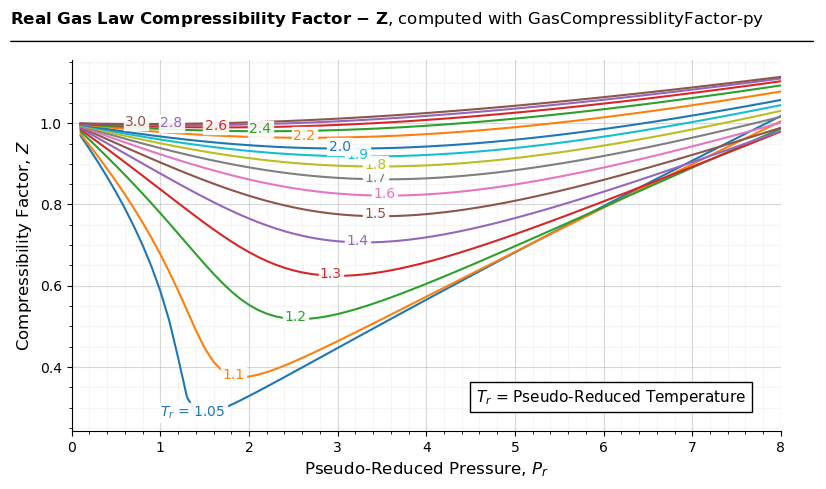

In [94]:
results, fig, ax = gc.quickstart(zmodel='DAK')

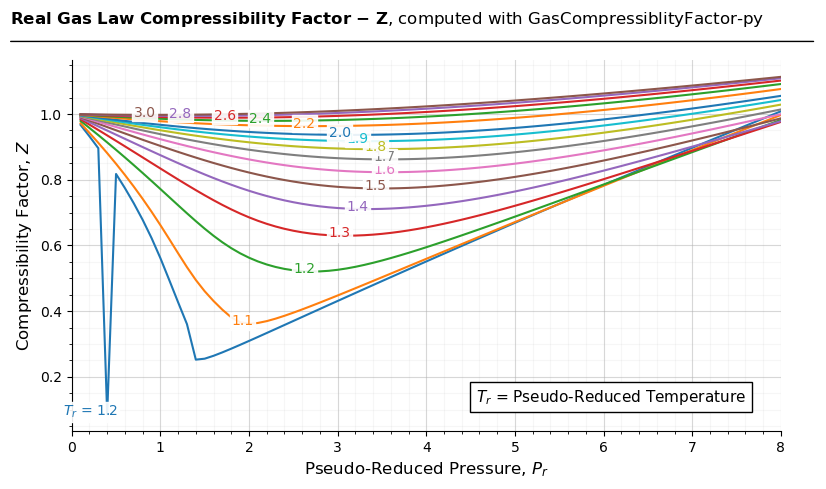

In [4]:
results, fig, ax = gc.quickstart(zmodel='londono')

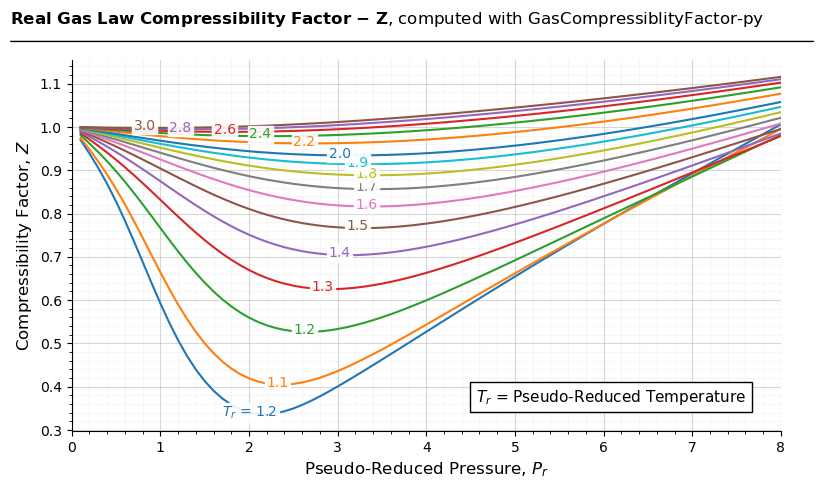

In [5]:
results, fig, ax = gc.quickstart(zmodel='kareem')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gascompressibility import calc_z
import time

In [2]:
from gascompressibility import calc_z

In [121]:
Prs = np.linspace(1.3, xmax, xmax * 10 + 1)

In [123]:
Prs = np.linspace(xmin, xmax, xmax * 10 + 1)
Prs = np.array([round(Pr, 1) for Pr in Prs])

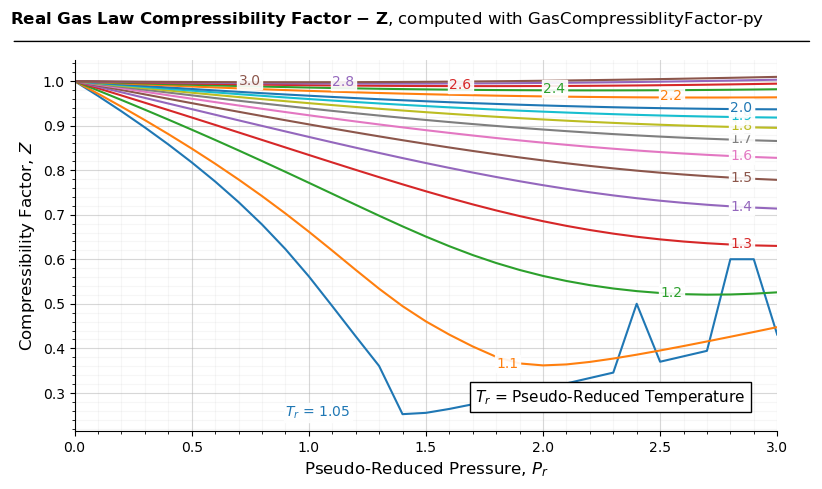

In [143]:
n = 50
xmax = 3
xmin = 0
zmodel = 'londono'
Prs = np.random.uniform(low=xmin, high=xmax, size=n)
Prs = np.sort(list(set([round(Pr, 2) for Pr in Prs])))

Prs = np.linspace(xmin, xmax, xmax * 10 + 1)
Prs = np.array([round(Pr, 1) for Pr in Prs])

Trs = np.array([1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

results = {Tr: {
    'Pr': np.array([]),
    'Z': np.array([])
} for Tr in Trs}

for Tr in Trs:
    for Pr in Prs:
        if zmodel == 'kareem':
            z = calc_z(Tr=Tr, Pr=Pr, zmodel=zmodel)
        else:
            #print('Pr=', Pr, 'Tr=', Tr)
            z = calc_z(Tr=Tr, Pr=Pr, zmodel=zmodel, newton_kwargs={'maxiter': 50})
        results[Tr]['Z'] = np.append(results[Tr]['Z'], [z], axis=0)
        results[Tr]['Pr'] = np.append(results[Tr]['Pr'], [Pr], axis=0)

label_fontsize = 12

fig, ax = plt.subplots(figsize=(8, 5))
for Tr in Trs:

    Zs = results[Tr]['Z']
    idx_min = np.where(Zs == min(Zs))

    p = ax.plot(Prs, Zs)
    if Tr == 1.05:
        t = ax.text(Prs[idx_min] - 0.5, min(Zs) - 0.005, '$T_{r}$ = 1.05', color=p[0].get_color())
        t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='white', pad=1))
    else:
        t = ax.text(Prs[idx_min] - 0.2, min(Zs) - 0.005, Tr, color=p[0].get_color())
        t.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='white', pad=1))

ax.set_xlim(xmin, xmax)
ax.minorticks_on()
ax.grid(alpha=0.5)
ax.grid(visible=True, which='minor', alpha=0.1)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_ylabel('Compressibility Factor, $Z$', fontsize=label_fontsize)
ax.set_xlabel('Pseudo-Reduced Pressure, $P_{r}$', fontsize=label_fontsize)
ax.text(0.57, 0.08, '$T_{r}$ = Pseudo-Reduced Temperature', fontsize=11, transform=ax.transAxes,
        bbox=dict(facecolor='white'))

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

ax.set_title(setbold('Real Gas Law Compressibility Factor - Z') + ", computed with GasCompressiblityFactor-py ",
             fontsize=12, pad=10, x=0.445, y=1.06)
ax.annotate('', xy=(-0.09, 1.05), xycoords='axes fraction', xytext=(1.05, 1.05),
            arrowprops=dict(arrowstyle="-", color='k'))

fig.tight_layout()

In [131]:
Tr = 1.05

In [132]:
results[Tr]['Z'].argmax()

28

In [133]:
results[Tr]['Pr'][results[Tr]['Z'].argmax()]

2.9

In [134]:
results[Tr]['Z'][results[Tr]['Z'].argmax()]

0.6001599916214487

In [135]:
results[Tr]['Z'][results[Tr]['Z'].argmax() - 1]

0.6001599877649825

In [136]:
results[Tr]['Z'][results[Tr]['Z'].argmax() + 1]

0.6001599916214487

In [137]:
calc_z(Pr=4.98, Tr=Tr, zmodel='hall_yarborough')

0.6700153555611706

In [139]:
calc_z(Pr=2.9, Tr=Tr, zmodel='londono')

0.6001599916214487

In [140]:
calc_z(Pr=2.9, Tr=Tr)

0.43466700861597257

In [142]:
calc_z(Pr=2.9, Tr=Tr, zmodel='hall_yarborough')

0.43014537318334606

In [71]:
calc_z(Pr=4.45, Tr=1.2, zmodel='hall_yarborough')

0.9001907637687616

In [148]:
MODEL_RANGES = {
    'DAK': {
        'Tr': (1, 3),
        'Pr': (0.2, 30)
    },
    'hall_yarborough': {
        'Tr': (1.15, 3),
        'Pr': (0.2, 20.5)
    },
    'londono': {
        'Tr': (1, 3),
        'Pr': (0.2, 30)
    },
    'kareem': {
        'Tr': (1.15, 3),
        'Pr': (0.2, 15)
    },
}

In [151]:
Pr = 31

In [152]:
np.logical_and(Pr > MODEL_RANGES['DAK']['Pr'][0], Pr < MODEL_RANGES['DAK']['Pr'][1]).all()

False

In [153]:
True and False

False

In [154]:
True and True

True

In [66]:
t = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for item in t:
    print(item)
    print(t)
    match = min(t, key=lambda x: abs(x - v))
    print(match)
    #print(t.pop(t.index(match)))
    #print('-------')
    
print(t)

0.1
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.2
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.3
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.4
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.5
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.6
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.7
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.8
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
0.9
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
1.0
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
0.3
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [57]:
min(t, key=lambda x: abs(x - v))

0.3